In [1]:
# imports
import sys
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal

In [2]:
params = {
    # exp
    "seed": 0,
    "exp_name": "play",
    "cv_folds": 10,
    "plot": True,
    "calib_methods": ["RF", "RF_CT", "RF_fulldata", 
                      "Platt", "ISO", "Rank", "CRF", "VA", "Beta", "Elkan", "tlr", "Line", 
                      "RF_boot", 
                      "RF_ens_r", "RF_ens_line", "RF_ens_CRF", "RF_ens_Platt", "RF_ens_ISO",  "RF_ens_Beta", 
                      "RF_large", "RF_large_line", "RF_large_Platt", "RF_large_ISO",  "RF_large_Beta"],
    "metrics": ["acc", "tce", "logloss", "brier", "ece", "auc"],
    
    #data
    "data_name": "synthetic",
    "data_size": 1000,
    "n_features": 2,

    "class1_mean_min":0, 
    "class1_mean_max":1,
    "class2_mean_min":1, 
    "class2_mean_max":3, 

    # calib param
    "bin_strategy": "quantile",
    "ece_bins": 20,
    "boot_size": 5000,
    "boot_count": 40,

    # RF hyper opt
    "hyper_opt": True,
    "opt_cv":5, 
    "opt_n_iter":10,
    "search_space": {
                    "n_estimators": [10],
                    "max_depth": [2,3,4,5,6,7,8,10,20,50,100],
                    "criterion": ["gini", "entropy"],
                    # "min_samples_split": [2,3,4,5],
                    # "min_samples_leaf": [1,2,3],
                    },
}
exp_key = "boot_count"
exp_values = [5, 10, 15, ]

In [3]:
calib_results_dict, data_list = cx.run_exp(exp_key, exp_values, params)
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=True, 
                                    std=True)

In [4]:
tables["tce"]

,RF,RF_CT,RF_fulldata,Platt,ISO,Rank,CRF,VA,Beta,Elkan,tlr,Line,RF_boot,RF_ens_r,RF_ens_line,RF_ens_CRF,RF_ens_Platt,RF_ens_ISO,RF_ens_Beta,RF_large,RF_large_line,RF_large_Platt,RF_large_ISO,RF_large_Beta
Data,,,,,,,,,,,,,,,,,,,,,,,,
5,0.006735,0.023843,0.006808,0.007703,0.01357,0.036173,0.006956,0.009424,0.008535,0.125174,0.02552,0.0073,0.006721,0.004326,0.004627,0.004784,0.005224,0.011612,0.006306,0.005009,0.005345,0.005418,0.011123,0.006067
10,0.006735,0.023843,0.006808,0.007703,0.01357,0.036173,0.006956,0.009424,0.008535,0.125174,0.02552,0.0073,0.006726,0.004223,0.004614,0.004526,0.005023,0.010973,0.006079,0.004472,0.005376,0.005210,0.011737,0.006112
Mean,0.006735,0.023843,0.006808,0.007703,0.01357,0.036173,0.006956,0.009424,0.008535,0.125174,0.02552,0.0073,0.006723,0.004275,0.004621,0.004655,0.005123,0.011292,0.006192,0.004741,0.005361,0.005314,0.011430,0.006089
Rank,11.000000,21.000000,12.000000,15.000000,20.00000,23.000000,13.000000,17.000000,16.000000,24.000000,22.00000,14.0000,10.000000,1.000000,3.000000,3.000000,5.000000,18.500000,8.500000,3.000000,6.500000,6.500000,18.500000,8.500000


In [5]:
tables["ece"]

,RF,RF_CT,RF_fulldata,Platt,ISO,Rank,CRF,VA,Beta,Elkan,tlr,Line,RF_boot,RF_ens_r,RF_ens_line,RF_ens_CRF,RF_ens_Platt,RF_ens_ISO,RF_ens_Beta,RF_large,RF_large_line,RF_large_Platt,RF_large_ISO,RF_large_Beta
Data,,,,,,,,,,,,,,,,,,,,,,,,
5,0.037422,0.1111,0.049602,0.049352,0.066128,0.099721,0.047023,0.045957,0.04663,0.230731,0.1213,0.041885,0.036209,0.048237,0.034215,0.048018,0.047510,0.090657,0.044524,0.057228,0.046746,0.042811,0.080253,0.048717
10,0.037422,0.1111,0.049602,0.049352,0.066128,0.099721,0.047023,0.045957,0.04663,0.230731,0.1213,0.041885,0.040956,0.044644,0.034033,0.047792,0.060849,0.078961,0.049042,0.040896,0.033611,0.047623,0.091789,0.062883
Mean,0.037422,0.1111,0.049602,0.049352,0.066128,0.099721,0.047023,0.045957,0.04663,0.230731,0.1213,0.041885,0.038583,0.046440,0.034124,0.047905,0.054180,0.084809,0.046783,0.049062,0.040179,0.045217,0.086021,0.055800
Rank,3.000000,22.0000,15.500000,14.500000,18.000000,21.000000,10.000000,7.500000,8.50000,24.000000,23.0000,5.000000,3.500000,10.000000,1.500000,12.000000,13.500000,19.500000,9.500000,10.500000,5.000000,8.000000,19.500000,15.500000


In [6]:
plot_calib_methods = params["calib_methods"].copy()
# plot_calib_methods.remove("Rank")
# plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("RF")
plot_calib_methods

['RF',
 'RF_CT',
 'RF_fulldata',
 'Platt',
 'ISO',
 'Rank',
 'CRF',
 'VA',
 'Beta',
 'Elkan',
 'tlr',
 'Line',
 'RF_boot',
 'RF_ens_r',
 'RF_ens_line',
 'RF_ens_CRF',
 'RF_ens_Platt',
 'RF_ens_ISO',
 'RF_ens_Beta',
 'RF_large',
 'RF_large_line',
 'RF_large_Platt',
 'RF_large_ISO',
 'RF_large_Beta']

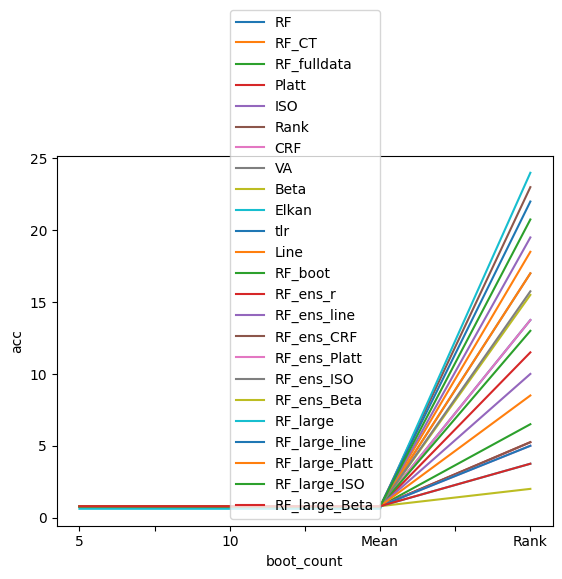

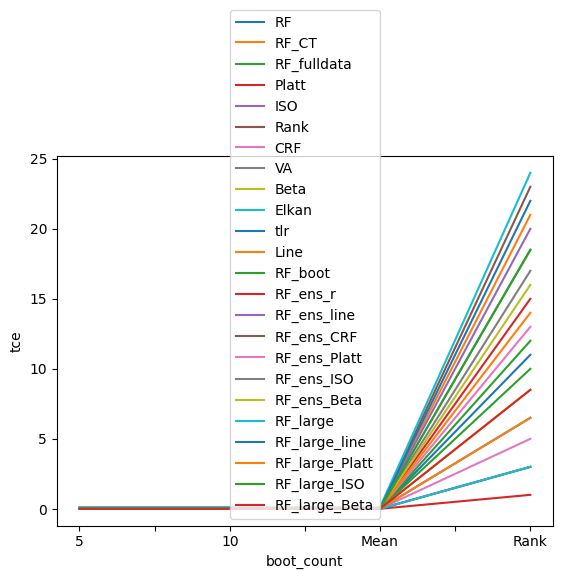

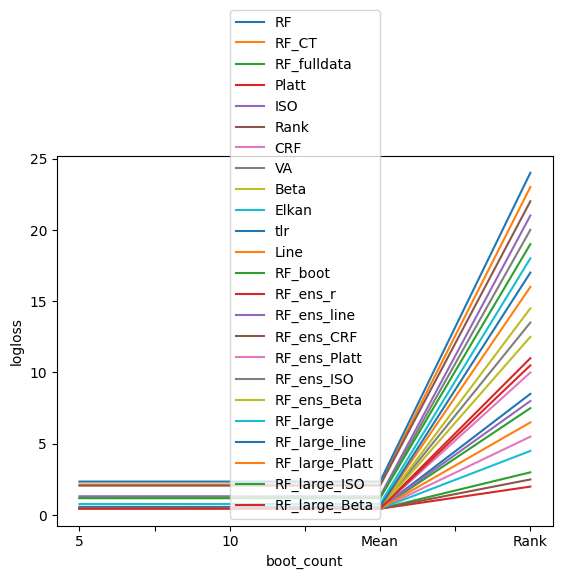

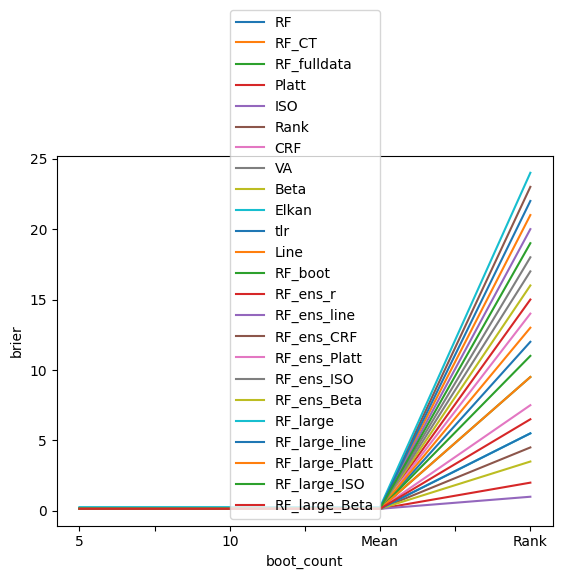

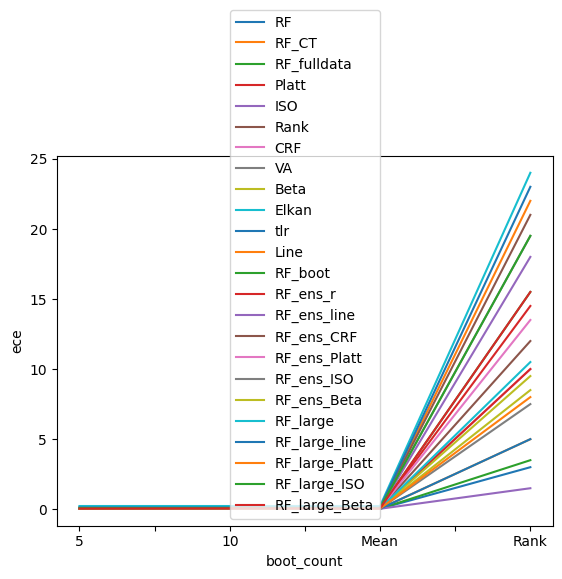

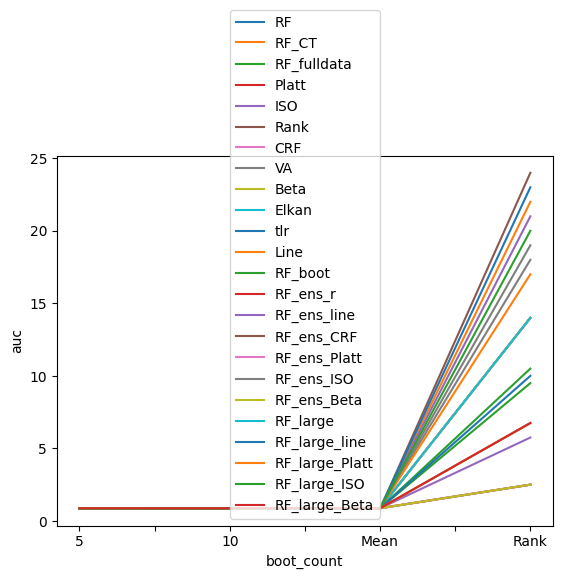

In [7]:
for metric in params["metrics"]:
    ax = tables[metric][plot_calib_methods].plot()
    ax.set_xlabel(exp_key)
    ax.set_ylabel(metric)